In [56]:
using DelimitedFiles    # Leitura/escrita de ficheiros em formato csv (delimitados por ,) 
using Statistics        # Estatística descritiva, inclui cálculo do desvio-padrão e quantis
using Distributions     # Distribuições de probabilidade
using HypothesisTests   # Testes de hipóteses
using ARCHModels        # Modelos GARCH
using StatsPlots        # Gráficos 

Módulo 1 - Introdução aos Riscos Financeiros

* 1.1 Noção e Tipologia dos Riscos Financeiros
 * 1.1.1. Noção de risco
 * 1.1.2. Tipologia dos riscos financeiros 
* 1.2. Medidas de Risco
 * 1.2.1. Medida de Risco Total: Volatilidade
 * 1.2.2. Medidas de Risco de Perda: Valor-em-Risco e Perda Esperada na Cauda
* 1.3 Determinação do VaR e ETL
 * 1.3.1. Cálculo do VaR por simulação histórica
 * 1.3.2. Cálculo do VaR pelo método analítico
 * 1.3.3. Cálculo do VaR por simulação de Monte-Carlo
 * 1.3.4. Retornos esperados e o cálculo do VaR e ETL
 * 1.3.5. Agregação Temporal
 * 1.3.6. Limitações do VaR e ETL
* 1.4. Testes de Stresse
 * 1.4.1. Análise de sensibilidade
 * 1.4.2. Análise de cenários
* 1.5. Procedimento de *Backtesting*
 * 1.5.1. Teste do Semáforo de Basileia
 * 1.5.2. Teste de Cobertura Incondicional de Kupiec
* 1.6. Regularidades Empíricas de Retornos Financeiros
 * 1.6.1. Caudas pesadas
      * 1.6.1.1. Gráficos QQ
      * 1.6.1.2. Testes de Normalidade
 * 1.6.2. Agrupamentos de volatilidade
     * 1.6.2.1. Volatilidade simples: a abordagem de simulação histórica clássica
     * 1.6.2.2. Médias móveis ponderadas exponencialmente: a abordagem de simulação histórica filtrada
     * 1.6.2.3. Modelos GARCH
     * 1.6.2.4. Volatilidade Implícita
 * 1.6.3. Dependência não-linear
* 1.7. A experiência da banca internacional
 * 1.7.1. JP Morgan
 * 1.7.2. Goldman Sachs 

### 1.1 Noção e Tipologia dos Riscos Financeiros

#### 1.1.1. Noção de risco

Qual o investimento de maior risco, A ou B?
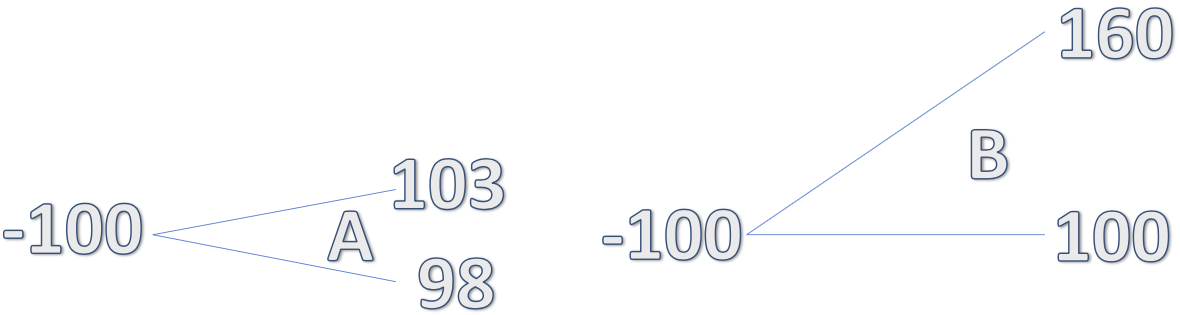

O investimento B tem maior risco! Em finanças associamos normalmente risco à incerteza ou 
amplitude dos retornos, ou seja ao seu desvio-parão.

Coloquialmente diríamos que A tem maior risco, mas nesse caso teríamos de qualificar 
o risco, falando de risco de PERDA.

Estes dois tipos de risco, **risco total** e **risco de perda**, irão desempenhar um papel muito importante nas análises que se irão seguir.

#### 1.1.2. Tipologia dos riscos financeiros 

Risco de Mercado
 * Risco preço de ações: resulta da exposição a variações de (i) preços e (ii) volatilidades de ações individuais, carteiras de ações e índices de ações.
 * Risco cambial: resulta da exposição a variações de (i) preços *spot*, (ii) preços *forward* e à (iii) volatilidade de taxas de câmbio. 
 * Risco taxa de juro: resulta da exposição a variações (i) no nível, inclinação e curvatura da estrutura temporal de taxas de juro, (ii) da volatilidade de taxas de juro, (iii) na velocidade de reembolsos antecipados (*prepayment*) e (iv) *spreads* de crédito.
 * Risco preço de *commodities*: resulta da exposição a variações de (i) preços *spot*, (ii) preços *forward* e (iii) volatilidades de *commodities*, tais como *crude oil*, produtos derivados do petróleo, gás natural, electricidade, metais preciosos e metais base.

Risco de Crédito
 * Concessão crédito
 * Risco da contraparte

Risco Operacional

### 1.2. Medidas de Risco

#### 1.2.1. Medida de Risco Total: Volatilidade 

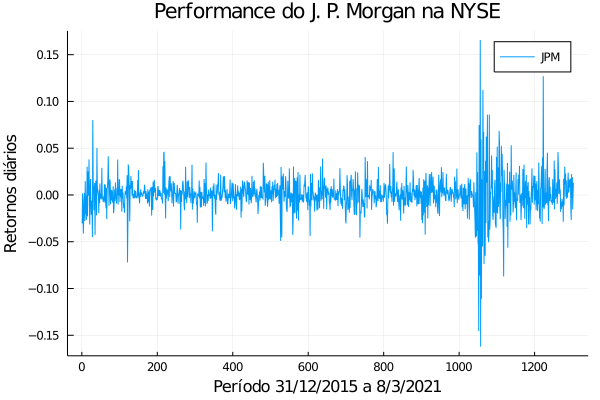

In [7]:
JPMorgan = vec(readdlm("Dados/JPMorgan.csv"))
display(plot(JPMorgan, title = "Performance do J. P. Morgan na NYSE",label = "JPM", 
        ylabel = "Retornos diários", xlabel = "Período 31/12/2015 a 8/3/2021"))

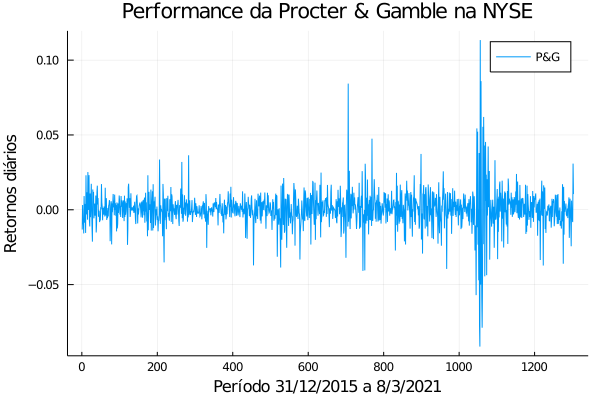

In [8]:
PG = vec(readdlm("Dados/Procter&Gamble.csv"))
display(plot(PG, title = "Performance da Procter & Gamble na NYSE",label = "P&G", 
        ylabel = "Retornos diários", xlabel = "Período 31/12/2015 a 8/3/2021"))

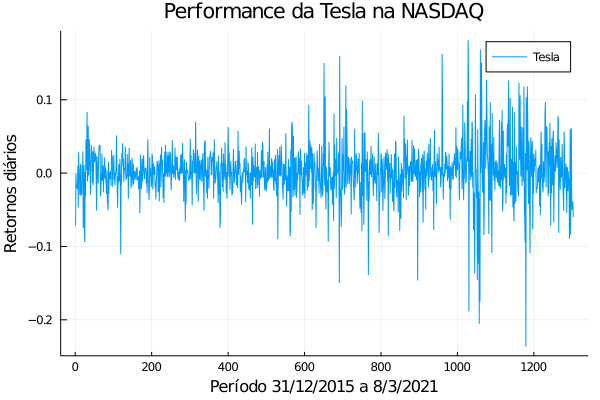

In [9]:
Tesla = vec(readdlm("Dados/Tesla.csv"))
display(plot(Tesla, title = "Performance da Tesla na NASDAQ",label = "Tesla", 
        ylabel = "Retornos diários", xlabel = "Período 31/12/2015 a 8/3/2021"))

In [10]:
println("σ(J.P.Morgan) = ", std(JPMorgan))
println("σ(Procter & Gamble) = ", std(PG))
println("σ(Tesla) = ",std(Tesla))

σ(J.P.Morgan) = 0.01911319719033801
σ(Procter & Gamble) = 0.012583667203944944
σ(Tesla) = 0.03657417332784471


#### 1.2.2. Medidas de Risco de Perda: Valor-em-Risco (VaR) e Perda Esperada na Cauda (ETL)

O **Valor-em-Risco**, ou VaR (*Value-at-Risk*) a um nível (α%), mede qual será a nossa perda mínima no caso de perdas tão severas que ocorrem apenas (α) por cento do tempo.

A **Perda Esperada na Cauda**, ou ETL (*Expected Tail Loss*) a um nível (α%), mede qual será a nossa perda média no caso de perdas tão severas que ocorrem apenas (α) por cento do tempo.

Para uma dada carteira, as medidas de risco VaR e ETL são calculadas considerando (i) o valor atual ($V_0$) da carteira, (ii) um horizonte temporal ($T$), assim como (iii) um determinado quantil ($\alpha$) de perdas, e (iv) pressupõem uma determinada distribuição de probabilidade (empírica ou analítica) para os retornos. 

$$\text{VaR}(V_0,T,α):\quad \mathbb{P}[\Delta V_T < - \text{VaR}] = \alpha$$

$$\text{ETL}(V_0,T,α):\quad \mathbb{E}[\Delta V_T \mid \Delta V_T < - \text{VaR}] = \alpha$$

Exemplo:
* VaR(T=1 dia, α=5%) = 50 000 Eur, significa que existe uma probabilidade de 5% de num dia a carteira vir a ter uma perda superior a 50 000 Eur. 
* ETL(T=1 dia, α=5%) = 65 000 Eur, significa que para os 5% piores desempenhos diários, a carteira irá ter uma perda em média superior a 65 000 Eur.

O VaR diário denomina-se DEaR (*Daily-Earnigs-at-Risk*). O ETL também é frequentemente denominado como *Expected Shortfall* (ES) ou *Conditional Value-at-Risk* (CVaR)

As medidas de risco VaR e ETL têm quatro usos principais em finanças:
* gestão de risco
* controlo financeiro
* relato financeiro 
* cálculo do capital regulatório

### 1.3. Determinação do VaR e ETL

In [11]:
# Definição do VaR ao nível de significância α ou nível de confiança (1-α)
VaR(distribuição, α, V) = - (quantile(distribuição,α) - mean(distribuição)) * V;

# O ponto e vírgula faz com que o resultado não apareça na célula de output subsequente

Metodologias:
 * Abordagem empírica por simulação histórica
 * Abordagem paramétrica pelo método analítico
 * Abordagem paramétrica por simulação de Monte-Carlo

In [12]:
# Nos exemplos seguintes, o valor da carteira V = 1 000 000 USD e o α = 5.0%
V = 1_000_000;  
α = 0.05;
# Podíamos ter V = 1000000, escolhemos o formato anterior para ficar mais legível

#### 1.3.1. Cálculo do VaR por simulação histórica

Séries temporais históricas de retornos → VaR, ETL

In [13]:
println("VaR diário JPMorgan = ", VaR(JPMorgan, α, V), " USD")
println("VaR diário Procter & Gamble = ", VaR(PG, α, V), " USD")
println("VaR diário Tesla = ", VaR(Tesla, α, V), " USD")

VaR diário JPMorgan = 27489.89319523052 USD
VaR diário Procter & Gamble = 16811.378438936405 USD
VaR diário Tesla = 53186.85326003964 USD


#### 1.3.2. Cálculo do VaR pelo método analítico

Distribuição, parãmetros estimados → Fórmula analítica → VaR, ETL

- Estimar parâmetros da distribuição escolhida. Neste exemplo, iremos escolher uma distribuição Normal - que assumimos bem caracterizar a distribuição dos retornos - e estimar os seus parâmetros (μ, σ)
- Utilizando a distribuição estimada, determinamos de seguida analiticamente o VaR 

Denotando por $\Phi$ a função de distribuição cumulativa da Normal($\mu,\sigma$), tem-se

$$\text{quantil}(\text{Normal}(\alpha\mid \mu, \sigma)) = \Phi^{-1}(\alpha\mid \mu, \sigma)$$ 
sendo $$\Phi(\alpha\mid \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^\alpha \exp\bigl({-\tfrac{1}{2}(x-\mu)^2/\sigma}\bigr)$$

In [14]:
# Estimar parâmetros da distribuição Normal para os retornos diários do J.P.Morgan, 
# Procter & Gamble e Tesla
println(fit(Normal, JPMorgan))
println(fit(Normal, PG))
println(fit(Normal, Tesla))

Normal{Float64}(μ=0.0007579467122181148, σ=0.01910586147823117)
Normal{Float64}(μ=0.00048190465996873977, σ=0.012578837548344319)
Normal{Float64}(μ=0.0018895141782965422, σ=0.036560136031865066)


In [15]:
# Utilizando a distribuição Normal com os parâmetros estimados, determinamos o VaR
println("VaR J.P.Morgan = ", VaR(fit(Normal, JPMorgan), α, V), " USD")
println("VaR Procter & Gamble = ", VaR(fit(Normal, PG), α, V), " USD")
println("VaR Tesla = ", VaR(fit(Normal, Tesla), α, V), " USD")

VaR J.P.Morgan = 31426.34554850096 USD
VaR Procter & Gamble = 20690.346564227522 USD
VaR Tesla = 60136.07235385247 USD


#### 1.3.3. Cálculo do VaR por simulação de Monte-Carlo

Distribuição, parãmetros estimados → Séries temporais simuladas de retornos → VaR, ETL

- Estimar parâmetros da distribuição escolhida. Neste exemplo, iremos escolher uma distribuição Normal - que assumimos bem caracterizar a distribuição dos retornos - e estimar os seus parâmetros (μ, σ)
- Utilizando a distribuição estimada, simulamos os retornos e a partir desses valores simulados calculamos o VaR

In [16]:
# Utilizando os parâmetros estimados anteriormente para a distribuição Normal, simular 1000 
# retornos diários para essa distribuiçao
JPMorgan_sim = rand(fit(Normal, JPMorgan), 1000)
PG_sim = rand(fit(Normal, PG), 1000)
Tesla_sim = rand(fit(Normal, Tesla), 1000)

1000-element Vector{Float64}:
 -0.025116340942442843
  0.0035798759818193096
  0.011635801331629163
 -0.12728163145515925
  0.024798248719443097
  0.03455483235051847
 -0.028696915172489144
 -0.0185357555116889
 -0.02988487559015474
  0.019480262533838052
  0.011172225380279429
  0.003617993268814618
  0.0549258806730895
  ⋮
 -0.02632977377398649
  0.007908680352797999
  0.030540454276133007
 -0.006090410269332316
 -0.02991240497419338
  0.007612857876744521
  0.0359102367160951
 -0.010125214193907744
  0.027655807415047185
 -0.02789178900340965
 -0.0031455188487391626
  0.005485481948825962

In [17]:
println("VaR J.P.Morgan = ", VaR(JPMorgan_sim, α, V), " USD")
println("VaR Procter & Gamble = ", VaR(PG_sim, α, V), " USD")
println("VaR Tesla = ", VaR(Tesla_sim, α, V), " USD")

VaR J.P.Morgan = 32554.814570960476 USD
VaR Procter & Gamble = 21418.030142355132 USD
VaR Tesla = 59570.95644232462 USD


#### 1.3.4. Retornos esperados e o cálculo do VaR e ETL

O VaR e ETL são medidas prospectivas, dizem respeito a perdas potenciais em momentos futuros. Interessa assim determinar o **valor esperado** do retorno da carteira $\mu_T = \mathbb{E}[\text{r}_T]$ e não a utilização do valor histórico da média dos retornos da carteira. 

O VaR (e ETL) pode ser definido utilizando a variação do valor prospetivo da carteira $V_T$ relativamente ao seu **valor esperado** $\mathbb{E}[V_T]$, denominado-o por VaR média ($\text{VaR}_m$), 

$$\text{VaR}_m = -(\text{quantil}_\alpha[V_T] - \mathbb{E}[V_T]) = - (\text{quantil}_\alpha[r_T] - \mu_T) \times V_0$$

Alternativamente, o VaR (e ETL) também pode ser definido utilizando a variação do valor prospetivo da carteira $V_T$ relativamente ao seu valor atual $V_0$, denominando-o por VaR zero ($\text{VaR}_0$),

$$\text{VaR}_0 = -(\text{quantil}_\alpha[V_T] - V_0) = - \text{quantil}_\alpha[r_T] \times V_0$$

O valor esperado dos retornos irá ser calculado de acordo com algum modelo, envolvendo normalmente a previsão de valores para algumas variáveis exógenas e a estimação de alguns parâmetros. Se fosse utilizado o CAPM, teríamos de efetuar (i) uma previsão para o valor esperado da variável exógena: retorno da carteira do mercado e (ii) a estimativa do parâmetro: beta da carteira em análise. 

Seja $\mu$ o retorno simples esperado da carteira em termos anuais. Como por convenção se considera que um ano tem 252 dias úteis, o retorno esperado para a carteira num dia será 
$$\mu_T = (1+\mu)^{\frac{T}{252}}-1$$

Normalmente o VaR e ETL são calculados para horizontes temporais curtos, de 1-10 dias úteis. Uma vez que $\mu_T\approx 0$ e não existe uma forma objectiva de determinar $\mu_T$,  é comum assumir-se que $\mu_T = 0$.

Nas análises subsequentes, tal como fizemos nas análises anteriores, iremos pois também assumir que o retorno esperado da carteira é igual a zero, ou seja que $\mu_T = 0$, e que portanto o $\text{VaR}_m$ e $\text{VaR}_0$ coincidem.

Dado $\mu_T = 0$, nas abordagens paramétricas (método analítico e simulação de Monte-Carlo) a distribuição prospetiva de retornos $r_T$ será,
$$r_T \sim \text{Distribuição}(0, \sigma_T)$$ 
ou
$$r_T \sim \sigma_T\times \text{Distribuição}(0, 1)$$ 
Se a distribição for uma Normal, estaremos perante uma Normal standard. Assim, podemos exprimir o VaR da seguinte forma equivalente

$$\text{VaR} = - \text{quantil}_\alpha[r_T]  \times V_0 = - \sigma_T \times \text{quantil}_\alpha[\text{Distribuição}(0,1)]  \times V_0$$

Se não tivessemos disponível a aplicação Julia, poderíamos nos socorrer de tabelas estatísticas que tabelam os quantis de distribuições padronizadas. Assim para as distribuições Normal e T-Student(6) padronizadas obteríamos os seguintes valores críticos $z_\alpha\equiv\text{quantil}_\alpha[\text{Distribuição}(0,1)]$


quantil        |    Nomal     | T-Student(6)
---------------|--------------|--------------
    1.0%  |   -2.326     |   -3.143
5.0%  |   -1.645     |   -1.943
10.0%  |   -1.282     |   -1.440


$$\text{VaR}_\alpha = - z_\alpha \times \sigma_T \times V_0$$

**Exemplo 1**. Pretendemos determinar o VaR diário do fundo de investimento Eureka de EUR 5.0 $\times$ 10$^6$ para os níveis $\alpha$ = 1.0\% e 2.5\%. A volatilidade diária foi estimada em 0.0065 e assume-se que uma Normal caracteriza bem a distribuição dos retornos.

Para $\alpha$ = 1.0\% temos, VaR = -(-2.326) $\times$ 0.0065 $\times$ 5000000 = EUR 75595.00. Temos pois uma probabilidade de 1.0% de virmos a ter uma perda superior a EUR 75595.00 num prazo de um dia.

Para $\alpha$ = 2.5\% não temos valores tabelados, mas claro podemos sempre utilizar a aplicação Julia,

In [52]:
V = 5_000_000
σ = 0.0065
α = 0.025
VaR_Eureka = - quantile(Normal(0,1),α) * σ  * V

println("VaR(2.5%) = EUR ", round(VaR_Eureka, digits = 2))
# A função round(expressão, digits = n) arredonda o resultado da expressão a n dígitos

VaR(2.5%) = EUR 63698.83


#### 1.3.5. Agregação Temporal

Para transformar o VaR de um horizonte temporal para um outro diferente é geralmente assumido que os retornos satisfazem as seguintes condições,
* Temporalmente independentes, o que implica que $\forall t, \; \text{cov}(r_t,r_{t-1})$ = 0
* Indenticamente Distribuídos, o que implica que $\forall t, \;\mathbb{E}[r_t]=\mu, \text{Variância}[r_t] = \sigma^2$

A presunção de retornos independentes é consistente com a hipótese de eficiência de mercados. Podemos transformar a média e a volatilidade diárias num horizonte de T dias fazendo

$$\mu_T = T \times \mu_\text{dia}$$
$$\sigma_T = \sqrt{T}\times \sigma_\text{dia}$$
Donde,

$$\text{VaR}^T_\alpha = - z_\alpha \times \sqrt{T} \times \sigma_\text{dia} \times V_0 $$

A condição de independência temporal poder ser testada através da estatística Q de [Ljung-Box](https://en.wikipedia.org/wiki/Ljung–Box_test), sendo a hipótese nula de independência da série cronológica. Função em Julia: ```LjungBoxTest(vetor_retornos, lag)```

**Exemplo 2**. O Fundo Eureka pretende agora determinar qual o VaR semanal da sua carteira a 1.0%.

Como não dispomos da volatilidade semanal dos retornos, iremos utilizar a volatilidade diária e fazer agregação temporal. Primeiro iremos testar a condição de independência temporal dos retornos para a JP Morgan, Procter & Gamble e Tesla

In [19]:
LjungBoxTest(JPMorgan, 2)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-12

Details:
    number of observations:         1303
    number of lags:                 2
    degrees of freedom correction:  0
    Q statistic:                    55.4806


In [20]:
LjungBoxTest(PG, 2)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-04

Details:
    number of observations:         1303
    number of lags:                 2
    degrees of freedom correction:  0
    Q statistic:                    22.3146


In [21]:
LjungBoxTest(Tesla, 2)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.3025

Details:
    number of observations:         1303
    number of lags:                 2
    degrees of freedom correction:  0
    Q statistic:                    2.39167


O teste de Ljung-Box rejeita a independência temporal dos retornos da JP Morgan e Procter & Gamble, ao contrário do que se passa com os retornos da Tesla. A dependência temporal está de acordo com a existência de fortes agrupamentos de volatilidade para a JP Morgan e Procter & Gamble.

Não obstante, iremos fazer a agregação temporal da volatilidade e considerando que uma semana tem 5 dias úteis teremos,
$$\text{VaR}^\text{semanal}_\alpha = -(-2.326) \times \sqrt{5} \times 0.0065 \times 5000000 = 169060.84$$

In [22]:
V = 5_000_000
σ = 0.0065
α = 0.01
T = 5
VaR_Eureka_semanal = - quantile(Normal(0,1),α) * sqrt(T) * σ  * V

println("VaR(1.0%) semanal = EUR ", round(VaR_Eureka_semanal, digits = 2))

VaR(1.0%) semanal = EUR 169060.84


#### 1.3.6. Limitações do VaR e ETL

* Movimentos anteriores nos fatores de risco do mercado podem não produzir previsões suficientemente precisas de todos os movimentos futuros do mercado
* O VaR e ETL não levam em consideração a liquidez relativa de diferentes posições de risco
* O VaR e ETL não estimam perdas potenciais em horizontes de tempo mais longos, onde os movimentos do mercado podem ser extremos

### 1.4. Testes de Stresse

Juntamente com o VaR e ETL, os testes de stresse são uma importante ferramenta usada na avaliação do risco de perda. Enquanto o VaR e ETL refletem o risco de perda devido a
mudanças adversas nos mercados usando o recente comportamento histórico do mercado, os 
testes de stresse refletem o risco de perda de mudanças hipotéticas no valor de posições 
sensíveis ao risco de mercado. Os teste de stresse medem pois a vulnerabilidade a perdas sob uma série de possíveis cenários de stresse económico e de mercado.

#### 1.4.1. Análise de sensibilidade

A análise de sensibilidade é usada para quantificar o impacto de um movimento de mercado em um único fator de risco em todas as posições detidas (por exemplo, preços de ações ou spreads de crédito) usando uma variedade de choques de mercado, variando desde aqueles que poderiam ser esperados ao longo de horizonte de um dia até aqueles que podem levar muitos meses a ocorrer.

#### 1.4.2. Análise de cenários

A análise de cenário é usada para quantificar o impacto de um evento específico, incluindo como o evento impacta vários fatores de risco simultaneamente. Ao realizar uma análise de cenário, geralmente consideramos uma série de resultados possíveis para cada cenário, variando de impactos de mercado adversos moderados a severos. Os testes de stresse são normalmente construídos usando (i) eventos históricos e (ii) cenários prospectivos hipotéticos. 

**Exemplo 3.** Um cenário adverso utilizado num teste de stresse poderia ser simultaneamente, (i) taxa de desemprego: 12.5%,  (ii) taxa de variação do PIB: -2.5%, (iii)  taxa de variação do preço das ações: -40.0% e (iv) taxa de variação do preço de imóveis residenciais: -20.0%.

### 1.5. Procedimento de *Backtesting*

O *backtesting* é um método geral para aquilatar como um modelo ou estratégia de negociação funcionaria à posteriori (*ex-post*), usando dados históricos. 

Ao testar uma ideia com dados históricos, é conveniente reservar um período de tempo de dados históricos apenas para fins de teste. Se o teste com dados fora da amostra for bem sucedido, tal poderá ajudar a confirmar a potencial viabilidade do modelo ou estratégia de negociação.

A validação dos modelos / estratégias de negociação envolve a comparação das perdas históricas realizadas versus as perdas estimadas. No caso do VaR e ETL a comparação deverá ser efetuada calculando os hipotéticos retornos assumindo uma composição da carteira fixa no decorrer do horizonte temporal da análise. Esta validação pode ser feita confrontando o número de excepções observadas (no caso do VaR, o número de vezes em que a perda excedeu o VaR) com o nível de significância ($\alpha$) e a dimensão da amostra. 

**Exemplo 4.** Se $\alpha$ = 5.0\% e o *backtest* é efetuado para 240 dias úteis, o número esperado de exceções será 0.05 $\times$ 240 = 12. Iremos pois comparar este valor esperado com o número de exceções de fato observado.

Para formalmente podermos aceitar ou rejeitar um modelo ou estratégia de negociação necessitamos de efetuar um teste estatístico formal. O objectivo é testar se o número de exceções é muito grande ou pequeno utilizando a distribuição da estatística de teste que visa distinguir se o modelo é incorreto ou se as exceções resultaram de "má sorte". Fonte: Risco de Mercado, Miguel Ferreira.

#### 1.5.1. Teste do Semáforo de Basileia

Este teste, que é definido no Acordo de Basileia, consiste no cálculo do número de excepções diárias durante o último ano face à estimativa do VaR diário com $\alpha$ = 1.0%. O comitê de Basileia definiu que até quatro exceções num ano (zona verde) é aceitável e que para dez ou mais exceções (zona vermelha) a penalização é automática. Com 5-9 exceções (zona amarela), a decisão é discrecionário por parte do supervisor bancário.

VaR diário com $\alpha$ = 1.0% e período de *backtest* de 250 dias. 

Zona     |	Exceções	 | Probabilidade	| Prob. Cumulativa
---------|-------------------|---------------|----------------------
Verde    |0	                 | 8.11%	      | 8.11%
         |1	    |20.47%	|28.58%
         |2	    |25.74%	|54.32%
         |3	|21.49%	|75.81%
         |4	|13.41%	|89.22%
Amarela	 |5	|6.66%	|95.88%
         |6	|2.75%	|98.63%
         |7	|0.97%	|99.60%
         |8	|0.30%	|99.89%
         |9	|0.08%	|99.97%
Vermelha |10	|0.02%	|99.99%
         |11	|0.00%	|100.00%
         |...	|...	|...
         
Fonte: Supervisory framework for the use of "backtesting" in conjunction with the internal models approach to market risk capital requirements. Basle Committee on Banking Supervision (1996).

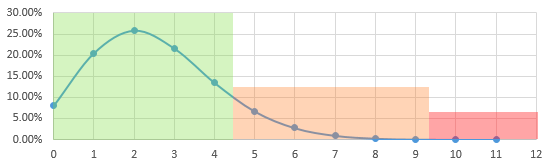

**Exemplo 5**. Pretendemos calcular o VaR diário a 1% para a Tesla de acordo com uma abordagem paramétrica, com dados para o último ano e aquilatar se este modelo iria passar o teste do semáforo de Basileia. Notemos que estamos a fazer uma análise dentro da amostra. Apesar disso, se por exemplo fizermos uma escolha desacertada para a distribuição que caracteriza os retornos, subestimando a probabilidade de eventos extremos, facilmente nos poderemos encontrar bastante fora da zona verda!

Como o ficheiro Tesla.csv não tem informação sobre datas, iremos utilizar as últimas 252 observações.  
1. Estimar o desvio-padrão da amostra
2. Assumir uma distribuição normal
3. Calcular o VaR, assumindo adicionalmente que $\mu_T$=0.
4. Calcular o número de exceções registadas face ao VaR que foi calculado em (3)
5. Classificar o número de exceções calculado em (4) de acordo com o teste do semáforo de Basileia   

In [64]:
Tesla252 = Tesla[end-251:end]  # criar amostra selecionando as 252 mais recentes observações

252-element Vector{Float64}:
 -0.14586457137702016
  0.05958689999550757
 -0.017350099445249987
 -0.12349321992425517
 -0.025164610281356938
 -0.20552226728199768
 -0.03398134500612111
 -0.17476299085707075
  0.16879448210076714
 -0.0002572959106286391
  0.015688110585511728
  0.15084589588243305
  0.06562084184574725
  ⋮
 -0.007751800958893596
 -0.08937618600877634
 -0.022161141335041903
  0.05995436726887011
 -0.08402407977651973
 -0.009898986126977004
  0.061615107986556554
 -0.04554944029608784
 -0.049635445306367064
 -0.04984401019282242
 -0.038532210761913974
 -0.060227530689928525

In [65]:
α = 0.01
V = 1                 # Valor da carteira é uma unidade monetária
σ = std(Tesla252)   # Calcular a volatilidade

0.05324892968495941

In [66]:
VaR252 = - σ * quantile(Normal(0,1),α) * V
# Podíamos também ter utilizado VaR252 = -(-2.326) * σ por exemplo

0.12387553436755581

In [67]:
Exceções = zeros(252)         # Inicializar o vetor das Exceções a zero
for i in 1:252
    if Tesla252[i] <= -VaR252
        Exceções[i] = 1       # Esta observação constitui uma exceção (representada por 1)
    end
end

In [117]:
Exceções[1:10]       # Vetor de exceções para as 10 primeiras observações

10-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0

Como podemos observar, já nas 10 primeiras observações registamos 3 exceções (na 2, 7 e 9 observação). De facto essas observações (-0.14586457137702016, -0.20552226728199768, 0.17476299085707075) ultrapassam o limite -VaR = -0.12373543868607244. Mas qual será o número total de exceções?

In [69]:
sum(Exceções)  # Somamos as exceções verificadas

4.0

Apesar de um começo pouco auspicioso, acabamos por ter no total apenas 4 exceções. Embora seja um número superior ao valor esperado de 1% $\times$ 252 = 2.52, estamos na desejada zona verde do teste do semáforo de Basileia!

#### 1.5.2. Teste de Cobertura Incondicional de Kupiec

Denotemos por T o número de observações, por N o número de exceções e como habitual por α o nível de significância associado ao VaR. O teste de cobertura incondicional de Kupiec é dado por,

In [28]:
Kupiec(T, N, α) = -2 * log((1-α)^(T-N) * α^N) + 2 * log((1-N/T)^(T-N) * (N/T)^N);

tendo uma distibuição chi-quadrado com um grau de liberdade. A hipótese nula é de que o modelo de VaR é adequado. O valor crítico a 5.0% é dado por,

In [29]:
zchi = quantile(Chisq(1),0.95)  # Calculamos o valor crítico a 5%

3.841458820694124

Se Kupiec > 3.841588 $\rightarrow$ rejeitamos modelo VaR

Se Kupied < 3.841588 $\rightarrow$ não rejeitamos modelo VaR

**Exemplo 6.** Será o nosso modelo muito simples para o VaR das ações Tesla criado no exercício 5. rejeitado pelo teste de cobertura incondicional de Kupiec?

In [30]:
T = 252
N = 4
α = 0.01
TesteKupiec = Kupiec(T, N, α)

0.7450809522744137

TesteKupec < 3.841588, donde que não rejeitamos o modelo criado para calcular o VaR das ações Tesla!

### 1.6. Regularidades Empíricas de Retornos Financeiros

* Caudas pesadas (*fat tails*)
* Agrupamentos de volatilidade (*volatility clusters*)
* Dependência não-linear

#### 1.6.1. Caudas pesadas

A existência de caudas pesadas (*fat tails*) sugere que se utilize outras distribuições, que não a Normal, com essa característica. Uma escolha popular é a distribuição T-Student com um número baixo de graus de liberdade.

##### 1.6.1.1. Gráficos QQ

Uma forma visual de comparar a distribuição empírica com a distribuição teórica candidata à sua representação é através de gráficos quantil-quantil, ou mais abreviadamente QQ.

Se pretendemos aquilatar numa primeira abordagem em que medida os retornos da (i) JP Morgan, (ii) Procter & Gamble e (iii) Tesla são bem representados por uma distribuição Normal, podemos comparar através de gráficos QQ os quantis das distribuições empíricas dos retornos destas ações com os quantis de uma distribuição Normal com idêntica média e desvio-padrão. 

**Exemplo 7.** Pretendemos inspecionar visualmente se uma distribuição Normal proporcionará uma boa caracterização das séries cronológicas de retornos das acções da JP Morgan, Procter & Gamble e Tesla.

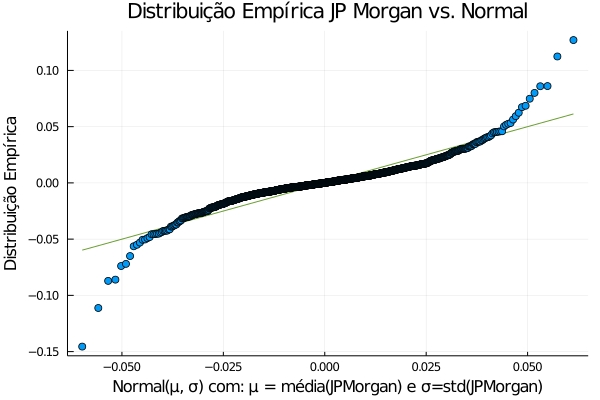

In [103]:
qqplot(Normal(mean(JPMorgan), std(JPMorgan)), JPMorgan, 
    title = "Distribuição Empírica JP Morgan vs. Normal", 
    xlabel = "Normal(μ, σ) com: μ = média(JPMorgan) e σ=std(JPMorgan)", ylabel = "Distribuição Empírica")

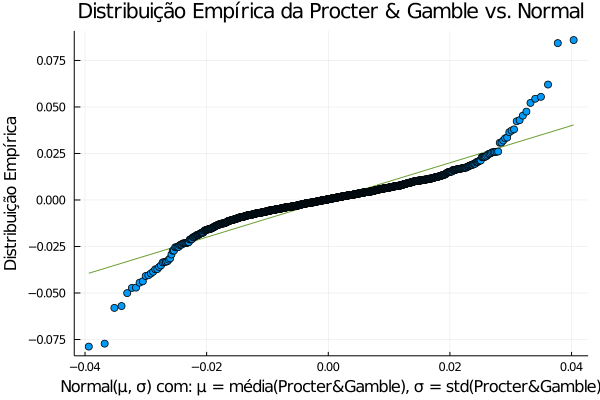

In [108]:
qqplot(Normal(mean(PG), std(PG)), PG, 
    title = "Distribuição Empírica da Procter & Gamble vs. Normal", 
    xlabel = "Normal(μ, σ) com: μ = média(Procter&Gamble), σ = std(Procter&Gamble)", ylabel = "Distribuição Empírica")

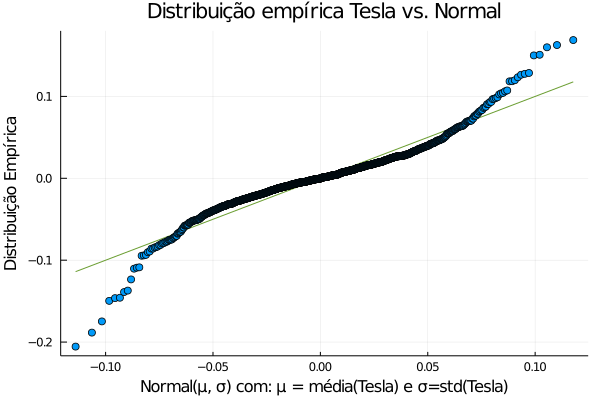

In [102]:
qqplot(Normal(mean(Tesla), std(Tesla)), Tesla, 
    title = "Distribuição empírica Tesla vs. Normal", 
    xlabel = "Normal(μ, σ) com: μ = média(Tesla) e σ=std(Tesla)", ylabel = "Distribuição Empírica")

Podemos constatar que a probabilidade de eventos extremos nos retornos da JP Morgam, Procter & Gample e Tesla são bastante superiores ao que uma distribuição Normal sugiria.

Podemos ver se a situção melhora com a utilização de uma distribuição com caudas mais pesadas como uma distribuição T-Studant standard, neste caso com 5 graus de liberdade. Para tal vamos padronizar as distribuições empíricas dos retornos subtraindo a média e dividindo pelo desvio padrão.

In [34]:
JPMorganP = (JPMorgan .- mean(JPMorgan))./std(JPMorgan)
PGP = (PG .- mean(PG))./std(PG)
TeslaP = (Tesla .- mean(Tesla))./std(Tesla)
# utilizamos o ponto para aplicar uma operação ou função elemento-a-elemento de um vetor

1303-element Vector{Float64}:
 -2.0112949413648855
 -0.04921397578427152
 -0.5942271729638253
 -0.478126929937254
 -0.6476731618683489
 -0.4629224897124598
  0.2258008241422108
 -1.3394148751060144
  0.7380587206824949
 -0.20992586762874932
 -0.08769960685764085
 -0.8677303493415229
  0.12253554749003265
  ⋮
 -0.2636099263479455
 -2.495359207957554
 -0.6575857586103843
  1.5875916748709542
 -2.349023535944376
 -0.3223176146622213
  1.6329991459517044
 -1.297061564430988
 -1.4087798792553032
 -1.4144823973843068
 -1.1051985940427689
 -1.6983854785019574

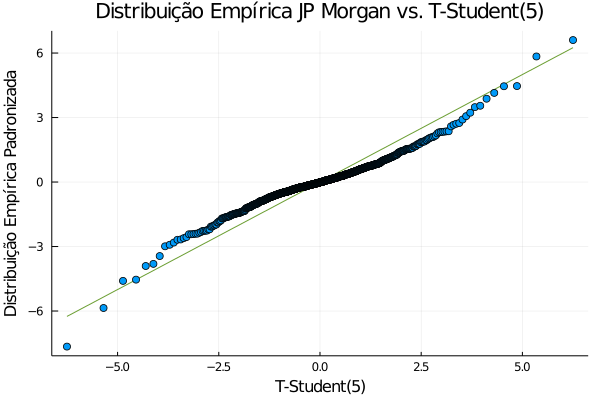

In [114]:
qqplot(TDist(5), JPMorganP, 
    title = "Distribuição Empírica JP Morgan vs. T-Student(5)", xlabel = "T-Student(5)",
ylabel = "Distribuição Empírica Padronizada")
# TDist(5) representa uma distribuição T-Student standard com 5 graus de liberdade

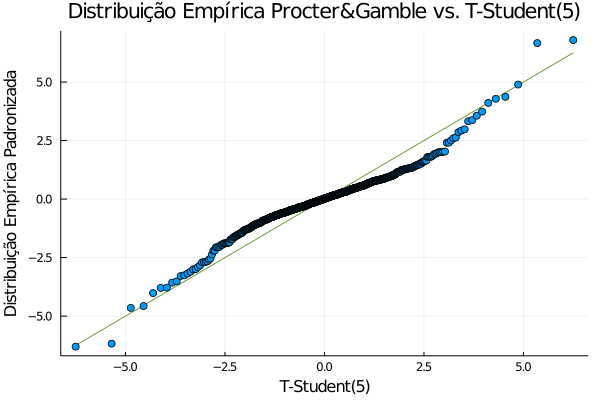

In [115]:
qqplot(TDist(5), PGP, 
    title = "Distribuição Empírica Procter&Gamble vs. T-Student(5)", xlabel = "T-Student(5)",
ylabel = "Distribuição Empírica Padronizada")

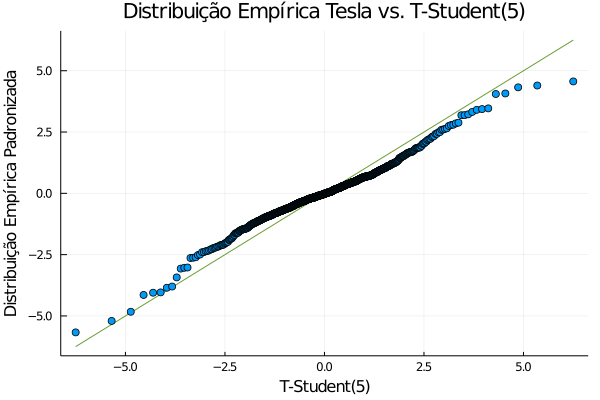

In [116]:
qqplot(TDist(5), TeslaP, 
    title = "Distribuição Empírica Tesla vs. T-Student(5)", xlabel = "T-Student(5)",
ylabel = "Distribuição Empírica Padronizada")

Os gráficos Q-Q sugerem que uma distribuição T-Student com um número baixo de graus de liberdade poderá representar melhor o perfil de retornos observado para as ações da JP Morgan, Procter & Gamble e Tesla do que uma distribuição Normal. 

##### 1.6.1.2. Testes de Normalidade

Iremos efetuar o teste de [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque–Bera_test) para a hipótese nula de que os vetores de retornos da JP Morgan, Procter & Gamble e Tesla são normalmente distribuídos. Função em Julia: ```JarqueBeraTest(vetor_retornos)```

In [38]:
JarqueBeraTest(JPMorgan)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.08461517807886676 and 18.496728495359918"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1303
    JB statistic:                   13039.6


In [39]:
JarqueBeraTest(PG)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.2211650655462532 and 17.64946039540837"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1303
    JB statistic:                   11662.0


In [40]:
JarqueBeraTest(Tesla)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.22184485011082597 and 8.780649539174123"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1303
    JB statistic:                   1824.89


Para a JP Morgan, Procter & Gamble e Tesla a hipótese nula de normalidade dos retornos é fortemente rejeitada.

#### 1.6.2. Agrupamentos de volatilidade

A existência de agrupamentos de volatilidade sugere que a utilização de volatilidades constantes possa conduzir a uma especificação errada para o processo dos retornos. Escolhas populares para ultrapassar este problema na previsão da volatilidade dos retornos são, a utilização de:
 * Estimação da volatilidade através de médias móveis ponderadas exponencialmente (EWMA)
 * Estimação da volatilidade através de modelos GARCH 
 * Extração de volatilidades implícitas do mercado de instrumentos derivados

##### 1.6.2.1. Volatilidade simples: a abordagem de simulação histórica clássica

A volatilidade (ou variância) simples corresponde aos cálculos que temos efetuado, onde assumindo-se como constante, o contributo de cada observação para a sua determinação é idêntico. Sendo ($m$) o número de dias observados e ($u_{t-k}$) a diferença entre o retorno ($r_{t-k}$) e a média de retornos ($\mu$), temos

$$\sigma^2_t = \frac{1}{m}\sum_{k=1}^m u_{t-k}^2, \qquad u_{t-k} = r_{t-k}-\mu$$

Todos os retornos quadráticos têm igual ponderação $a = \frac{1}{m}$. Na variãncia simples, um retorno muito recente não tem maior impacto no cálculo da variância do que um retorno muito afastado.

##### 1.6.2.2. Médias móveis ponderadas exponencialmente: a abordagem de simulação histórica filtrada

Nas médias móveis exponencialmente ponderadas, ou EWMA (*exponentially weighted moving average*), os retornos mais recentes têm uma mais elevada ponderação na determinação da variância. Os retornos quadráticos têm associado um parâmetro de alisamento $\lambda \in (0,1)$ que define ponderadores variáveis da seguinte forma,

$$\sigma^2_t =\sum_{k=1}^m(1-\lambda)\lambda^{k-1} \,u_{t-k}^2, \qquad u_{t-k} = r_{t-k}-\mu $$ 

Num documento muito influente, da [RiskMetrics](https://www.msci.com/documents/10199/5915b101-4206-4ba0-aee2-3449d5c7e95a), então parte da J.P.Morgan/Reuters, é sugerida no caso de retornos diárioa a utilização do valor 0.94 para o parâmetro $\lambda$. Assim, teríamos uma ponderação do retorno quadrático de (1-0.94)$\times$0.94$^0$ = 0.06 para a observação mais recente, para a observação seguinte de (1-0.94)$\times$0.94$^1$ = 0.0564. O retorno quadrático do terceiro dia mais recente teria uma ponderação igual a (1-0.94)$\times$0.94$^2$ = 0.053016.

A equação anterior pode ser expressa de uma forma recursiva equivalente através de,

$$\sigma^2_t = \lambda\,\sigma^2_{t-1} + (1-\lambda)\,u^2_{t-1}, \qquad u_{t-1} = r_{t-1}-\mu $$

Um parâmetro $\lambda$ mais elevado induz um decaimento mais vagaroso nos ponderadores da série. Pelo contrário, se reduzirmos o parâmetro $\lambda$ teremos um decaimento mais rápido.

In [41]:
function EWMA(serie, lambda)
    m = length(serie)
    media = mean(serie)                 # calculamos a média dos retornos osbservados
    σ2 = 0
    for k in 1:m
        σ2 += (1-lambda)*lambda^(k-1) * (serie[end-k+1] - media)^2
    end
    return sqrt(σ2)                     # retornamos a volatilidade
end

EWMA (generic function with 1 method)

**Exemplo 8.** Pretendemos comparar a volatilidade simples com a volatilidade calculada através de médias móveis ponderadas exponencialmente (EWMA)

In [42]:
println("σ(JP Morgan): Simples = ", std(JPMorgan), 
    ", EWMA = ", EWMA(JPMorgan, 0.94))

println("σ(Procter & Gamble): Simples = ", std(PG), 
    ", EWMA = ", EWMA(PG, 0.94))

println("σ(Tesla): Simples = ", std(Tesla), 
    ", EWMA = ", EWMA(Tesla, 0.94))

σ(JP Morgan): Simples = 0.01911319719033801, EWMA = 0.01526368307400409
σ(Procter & Gamble): Simples = 0.012583667203944944, EWMA = 0.012179798795874231
σ(Tesla): Simples = 0.03657417332784471, EWMA = 0.045029809093438


A JP Morgan está atualmente num regime de volatilidade mais baixo do que a média histórica, para a Procter & Gamble os niveis de volatildade são semelhantes e para a Tesla o atual regime de volatilidade ainda é mais alto do que a média histórica, já de si bastante alto.

##### 1.6.2.3. Modelos GARCH

Os modelos GARCH (*generalized autoregressive conditional heteroskedasticity*) são frequentemente utilizados para modelizar séries cronológicas financeiras que evidenciam volatilidade temporalmente variável e agrupamentos de volatilidade e podem-se incluir na família de modelos de volatilidade estocástica.

O modelo GARCH(p,q), onde $p$ é a ordem dos termos GARCH em $\sigma^2$ e $q$ é a ordem dos termos GARCH em $u^2$, é dado por,

$$\sigma^2_t = \omega +  \sum_{k=1}^p \beta_{k} \sigma_{t-k}^2 + \sum_{k=1}^q \alpha_{k} u_{t-k}^2, \qquad u_{t-k} = r_{t-k}-\mu $$

Os modelos GARCH contituem uma generalização da equação utilizada pelo método EWMA. Envolvem também um processo de estimação repousando em hipóteses sobre a distribuição dos desvios dos retornos face à sua média, ao contrário do método EWMA. Os $p$ parâmetros $\alpha_k$ e $q$ parâmetros $\beta_k$ podem ser estimados econometricamente pela aplicação `ARCHModels` escrita em Julia. É o que faremos no exemplo seguinte.

**Exemplo 9.** Utilizando a aplicação `ARCHModels` pretendemos estimar modelos GARCH(1,1) para as séries cronológicas de retornos da JP Morgan, Procter & Gamble e Tesla e obter estimativas para a volatilidade, comparando estas com as volatilidades simples já anteriormente calculadas.

In [43]:
JPMorgan_garch = fit(GARCH{1, 1}, JPMorgan)


GARCH{1, 1} model with Gaussian errors, T=1303.

Mean equation parameters:
────────────────────────────────────────────
    Estimate    Std.Error  z value  Pr(>|z|)
────────────────────────────────────────────
μ  0.0011545  0.000369369   3.1256    0.0018
────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   1.93103e-5  3.50494e-6   5.50945    <1e-07
β₁  0.748778    0.0277721   26.9615     <1e-99
α₁  0.180728    0.0408936    4.41947    <1e-05
──────────────────────────────────────────────


In [44]:
PG_garch = fit(GARCH{1, 1}, PG)


GARCH{1, 1} model with Gaussian errors, T=1303.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000534727  0.000259276  2.06238    0.0392
──────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   8.32503e-6  7.76659e-6   1.0719     0.2838
β₁  0.780146    0.0298261   26.1565     <1e-99
α₁  0.160818    0.0519534    3.09543    0.0020
──────────────────────────────────────────────


In [45]:
Tesla_garch = fit(GARCH{1, 1}, Tesla)


GARCH{1, 1} model with Gaussian errors, T=1303.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000965711  0.000854214  1.13053    0.2583
──────────────────────────────────────────────

Volatility parameters:
───────────────────────────────────────────────
      Estimate   Std.Error    z value  Pr(>|z|)
───────────────────────────────────────────────
ω   6.20899e-6  7.97245e-6   0.778805    0.4361
β₁  0.964187    0.0105026   91.8049      <1e-99
α₁  0.0317197   0.0131582    2.41065     0.0159
───────────────────────────────────────────────


Os parâmetros $\hat{\alpha}_1$ e $\hat{\beta}_1$ estimados para a equação de volatilidade são altamente significantes, novamente confirmando a presença de agrupamentos de volatilidade.

Com base no modelo GARCH(1,1) estimado, vamos agora efetuar a previsão da volatilidade um-passo-à-frente para a JP Morgan, Procter & Gample e Tesla e comparar com a volatilidade simples. A aplicação `ARCHModels` dispõe da função `predict`para previsão da volatilidade

In [46]:
println("σ(JP Morgan): Simples = ", std(JPMorgan), 
    ", GARCH(1,1) = ", predict(JPMorgan_garch, :volatility))

println("σ(Procter & Gamble): Simples = ", std(PG), 
    ", GARCH(1,1) = ", predict(PG_garch, :volatility))

println("σ(Tesla): Simples = ", std(Tesla), 
    ", GARCH(1,1) = ", predict(Tesla_garch, :volatility))

σ(JP Morgan): Simples = 0.01911319719033801, GARCH(1,1) = 0.01472891270787731
σ(Procter & Gamble): Simples = 0.012583667203944944, GARCH(1,1) = 0.014614175946418704
σ(Tesla): Simples = 0.03657417332784471, GARCH(1,1) = 0.042342623932872685


In [47]:
# Se pretendermos a previsão da volatilidade n-passos-à-frente fazemos 
predict.(Tesla_garch, :volatility, 1:3)    # com n = 3

3-element Vector{Float64}:
 0.042342623932872685
 0.041652105380570195
 0.040975298780576846

**Exemplo 10.** Vamos calcular o VaR assumindo que em vez de termos uma volatilidade constante dada pela volatilidade simples ela é antes dada por um modelo GARCH(1,1) o qual, como vimos, é mais indicado para situações de agrupamento de volatilidade. O nível de signficância $\alpha$ é igual a 5.0% e o valor da carteira, constituída apenas por ações da Tesla, é uma unidade monetária.

In [48]:
α = 0.05
V = 1
VaRs(Tesla_garch, α) * V

1303-element Vector{Float64}:
 0.059193450753287684
 0.06195576762263507
 0.06095512277694015
 0.0602783718733836
 0.05950619760528718
 0.058927197122232516
 0.058173801026452476
 0.05731173998406158
 0.05810785370412497
 0.05775733367769638
 0.05687555769085264
 0.05598200610271514
 0.055824929967546254
 ⋮
 0.05704377842094812
 0.05619990166659101
 0.06122832275414271
 0.06061569066295671
 0.06205711414165087
 0.0658648498243735
 0.06486209966737408
 0.06619516582791804
 0.06649930162361922
 0.06704208728590205
 0.0675746059095565
 0.06744640528724505

Podemos também ver num gráfico as rendibilidades históricas observadas confrontadas com o valor do VaR para a Tesla. Os retornos estão apresentados como $-r_t$, isto é um retorno de -0.02 é uma perda de 0.02. O VaR vai agora evoluindo à medida que as estimativas da volatilidade um-passo-à-frente do modelo GARCH(1,1) se vão alterando

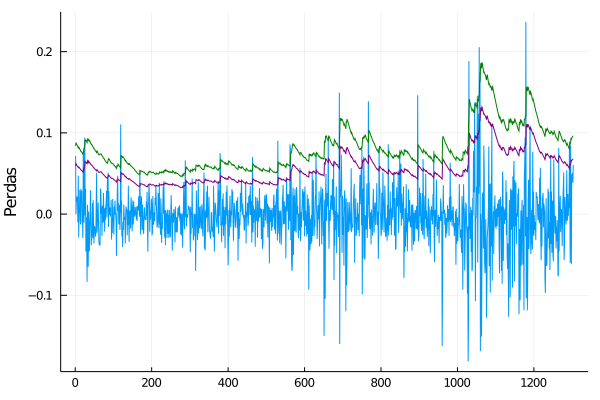

In [49]:
plot(-Tesla, legend=:none, ylabel="Perdas")
plot!(VaRs(Tesla_garch, α) * V, color=:purple)         # VaR com α = 5.0%
plot!(VaRs(Tesla_garch, 0.01) * V, color=:green)       # VaR com α = 1.0%

##### 1.6.2.4. Volatilidade Implícita

A volatilidade implícita de um contrato de opção é o valor da volatilidade do instrumento subjacente que, quando inserido num modelo de valorização de opções (como o modelo Black-Scholes), retornará um valor teórico igual ao preço de mercado atual da referida opção.

#### 1.6.3. Dependência não-linear

A existência de dependência não linear, em particular o fato da correlação entre séries de retornos não ser constante, sendo maior em momentos de maior turbulência do mercado, deve ser levada em conta aquando da modelização do risco de perda em portfólios.

### 1.7. A experiência da banca internacional

#### 1.7.1. JP Morgan 

*JPMorgan Chase utilizes VaR, a statistical risk measure, to estimate the potential loss from adverse market moves in the current market environment*. 
    
*The framework is employed across the Firm using historical simulation based on data for the previous 12 months. The framework’s approach assumes that historical changes in market values are representative of the distribution of potential outcomes in the immediate future*. 

*The Firm’s Risk Management VaR is calculated assuming a one-day holding period and an expected tail-loss methodology which approximates a 95% confidence level*.

*The Firm calculates separately a daily aggregated VaR in accordance with regulatory rules (“Regulatory VaR”), which is used to derive the Firm’s regulatory VaR-based capital requirements under Basel III. This Regulatory VaR model framework currently assumes a ten business-day holding period and an expected tail loss methodology which approximates a 99% confidence level*. 

Fonte: JP Morgan Chase & Co. 2019 Annual Report

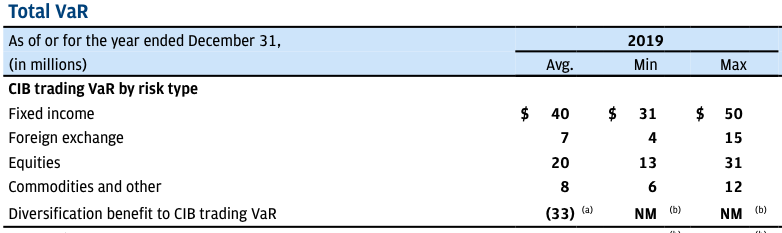
Fonte: JP Morgan Chase & Co. 2019 Annual Report

#### 1.7.2. Goldman Sachs 

*We use a variety of risk measures to estimate the size of potential losses for both moderate and more extreme market moves over both short- and long-term time horizons. Our primary risk measures are VaR, which is used for shorter-term periods, and stress tests. Our risk reports detail key risks, drivers and changes for each desk and business, and are distributed daily to senior management of both our revenue-producing units and our independent risk oversight and control functions*.

*VaR is the potential loss in value due to adverse market movements over a defined time horizon with a specified confidence level. We typically employ a one-day time horizon with a 95% confidence level. We use a single VaR model, which captures risks including interest rates, equity prices, currency rates and commodity prices*.

*To comprehensively capture our exposures and relevant risks in our VaR calculation, we use historical simulations with full valuation of market factors. We sample from five years of historical data to generate the scenarios for our VaR calculation. The historical data is weighted so that the relative importance of the data reduces over time. This gives greater importance to more recent observations and reflects current asset volatilities, which improves the accuracy of our estimates of potential loss*.

*Given its reliance on historical data, VaR is most effective in estimating risk exposures in markets in which there are no sudden fundamental changes or shifts in market conditions*.

Fonte: The Goldman Sachs Group, Inc. 2019 Annual Report 

 Média do VaR diário
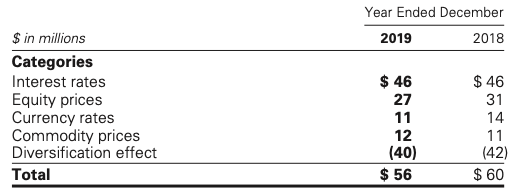
Fonte: The Goldman Sachs Group, Inc. 2019 Annual Report 

### 1.8. Teoria da carteira

### 1.9. Risco sistemático, risco específico e rendibilidade esperada

### 1.10. Supervisão de Risco

#### 1.7.1. Basileia III/IV

Basileia III define um rácio de solvabilidade, ou de requerimento de capital, que os bancos devem satisfazer, ponderando o montante de capital próprio ordinário mais resultados retidos (*common equity Tier 1* (CET1)) e o montante de ativos ponderados pelo risco (*risk-weighted assets* (RWA)), tal que,

<p style="text-align: center;"> $\text{Rácio Solvabilidade:}\quad  \frac{\text{Capital Próprio Ordinário Tier 1}}{\text{Ativos Ponderados pelo Risco}} \geq 7.0\%$<p>

O montante de ativos ponderados pelo risco é determinado pela medição da exposição aos riscos de mercado, de crédito e risco operacional. A medição do risco de mercado é efetuada fundamentalmente através da determinação do VaR e ETL para as posições detidas. Relativamente ao risco de crédito, os bancos poderão seguir três abordagens distintas para determinar o montante de ativos ponderados pelo risco: 
* Abordagem **standard**, com utilização de ratings externos, 
* Abordagem **fundação**, baseada em ratings internos (*Foundation-IRB*) para a probabilidade de incumprimento 
* Abordagem **avançada**, baseada em ratings internos (*Advanced-IRB*) para a probabilidade de incumprimento, perda dado incumprimento e exposição aquando incumprimento.

Basilia III define adicionalmente um amortecedor anti-cíclico discricionário, permitindo que supervisores nacionais exijam até adicioanis 2.5% do montante de ativos poderados pelo risco RWA em capital próprio ordinario Tier 1 durante períodos de elevado crescimento do crédito. 

Basileia III introduz também um rácio de alavancamento mínimo, o qual não leva em conta a ponderações dos ativos pelo risco, considerando antes a soma da exposição de todos os ativos e rúbricas fora do balanço

<p style="text-align: center;"> $\text{Rácio Alavancamento:}\quad  \frac{\text{Capital Próprio Ordinário Tier 1}}{\text{Média Ativo Total Consolidado}} \geq 3.0\%$<p>

Finalmente, Basileia III introduz também dois rácios de liquidez,

<p style="text-align: center;"> $\text{Rácio Cobertura de Liquidez (LCR):}\quad  \frac{\text{Ativos líquidos de qualidade elevada}}{\text{Total de net outflows de liquidez por 30 dias}} \geq 100\%$<p>

<p style="text-align: center;"> $\text{Rácio de Financiamento Líquido Estável (NSFR):}\quad  \frac{\text{Montante disponível de fundos estáveis}}{\text{Montante requerido de fundos estáveis}} \geq 100\%$<p>

Os termos de Basileia IV foram acordados em 2017 e devem ser implementados em Janeiro de 2023. As principais alterações residem (i) na definição de um limite inferior ao requerimento de capital de modo que este seja sempre pelo menos 72.5% do requerimento determinado pela abordagem *standard*, (ii) maior precisão na fronteira entre o *trading book* representando os ativos detidos para negociação e o *banking book* representando os ativos que se espera serem detidos até à maturidade, como os empréstimos a clientes.

#### 1.7.2. Solvência II

#### 1.7.3. IFRS9 e CECL

### Estudo do Caso 1.  Análise de risco num fundo de investimento em ações do Dow Jones

### Apêndice 1. Retornos simples e logarítmicos